<a href="https://colab.research.google.com/github/ulyazzh/capstone_bengkelkoding/blob/main/capstone/capstone2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
#membaca dataset
df = pd.read_csv('/content/ObesityDataSet.csv')

In [ ]:
#menampilkan dataset
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# Menampilkan info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [ ]:
# Daftar kolom yang seharusnya numerik
numeric_cols = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'FCVC', 'TUE']

# Membersihkan dan mengonversi ke numerik
for col in numeric_cols:
    df[col] = df[col].astype(str)                   # Ubah ke string dulu
    df[col] = df[col].str.replace(r'[^\d.]', '', regex=True)  # Hapus karakter non-angka
    df[col] = pd.to_numeric(df[col], errors='coerce')         # Konversi ke float, yang error jadi NaN

# Cek hasilnya
print(df[numeric_cols].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     2089 non-null   float64
 1   Height  2089 non-null   float64
 2   Weight  2092 non-null   float64
 3   NCP     2089 non-null   float64
 4   CH2O    2096 non-null   float64
 5   FAF     2092 non-null   float64
 6   FCVC    2093 non-null   float64
 7   TUE     2096 non-null   float64
dtypes: float64(8)
memory usage: 132.1 KB
None


In [ ]:
print(df[numeric_cols].isna().sum())


Age       22
Height    22
Weight    19
NCP       22
CH2O      15
FAF       19
FCVC      18
TUE       15
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2102 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2106 non-null   object 
 5   FAVC                            2100 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2101 non-null   object 
 9   SMOKE                           2106 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2098 non-null   object 
 12  FAF                             20

In [ ]:
# menampilkan jumlah baris dan kolom
df.shape

(2111, 17)

In [ ]:
# deskripsi data
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2089.000000,2089.000000,2092.000000,2093.000000,2089.000000,2096.000000,2092.000000,2096.000000
mean,24.717928,1.706623,88.608184,2.443519,2.729418,2.030560,1.078026,0.683624
std,8.391323,0.117700,36.154617,0.642754,0.981124,0.737945,1.164163,0.731461
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.955257,1.630000,66.000000,2.000000,2.675411,1.569911,0.129174,0.000000
50%,22.814657,1.701284,83.000000,2.397284,3.000000,2.000000,1.000000,0.626629
75%,26.000000,1.770000,108.055736,3.000000,3.000000,2.482454,1.684113,1.000000
max,106.441252,2.853986,441.131078,8.706795,12.299828,9.233294,12.270275,7.669504


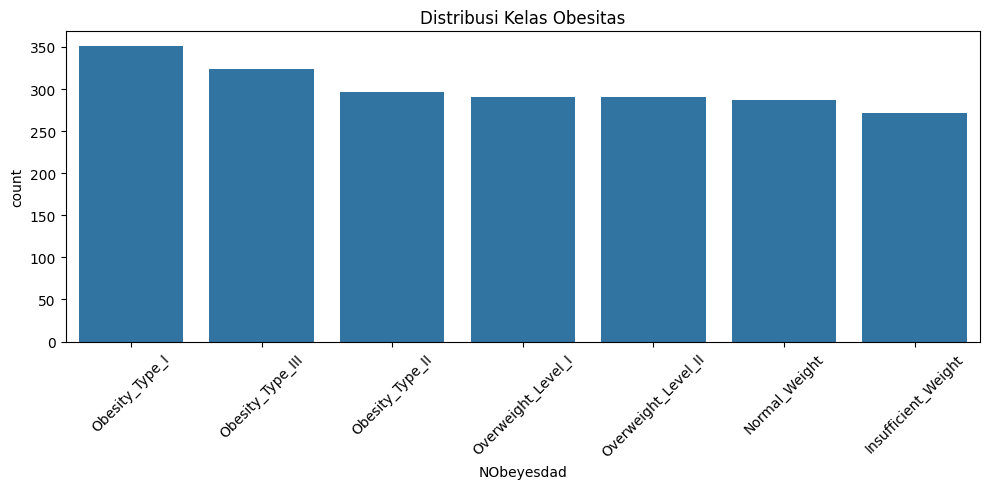

In [ ]:
#menampilkan visualisasi distribusi kelas obesitas
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.title("Distribusi Kelas Obesitas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

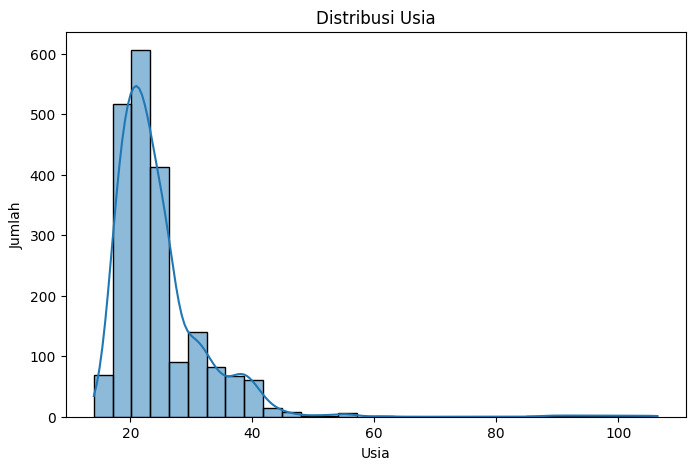

In [ ]:
#menampilkan distribusi usia
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Distribusi Usia")
plt.xlabel("Usia")
plt.ylabel("Jumlah")
plt.show()


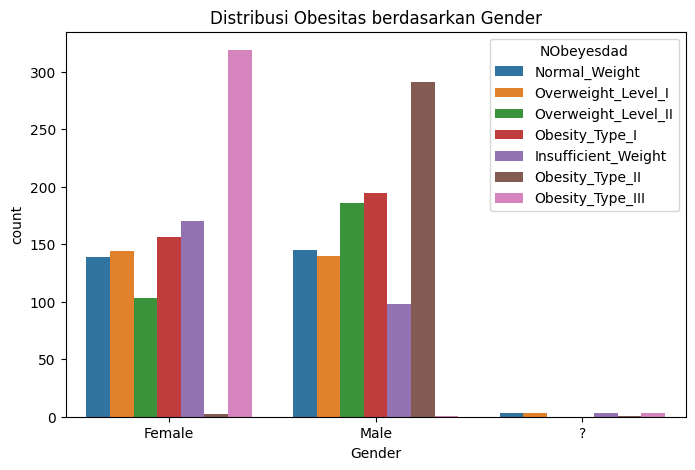

In [ ]:
# Visualisasi gender vs tingkat obesitas
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='NObeyesdad', data=df)
plt.title("Distribusi Obesitas berdasarkan Gender")
plt.show()

In [ ]:
#cek missing value
df.isnull().sum()

,0
Age,22
Gender,9
Height,22
Weight,19
CALC,5
FAVC,11
FCVC,18
NCP,22
SCC,10
SMOKE,5


In [ ]:
df[df.isnull().any(axis=1)]

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
19,23.000000,Female,1.650000,70.000000,Sometimes,no,2.0,1.0,no,no,2.000000,yes,0.000000,NaN,Sometimes,Public_Transportation,Overweight_Level_I
33,39.000000,Male,1.790000,NaN,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
64,21.000000,Female,1.660000,NaN,no,yes,2.0,3.0,no,no,1.000000,yes,1.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
67,23.000000,Male,1.650000,95.000000,Frequently,yes,2.0,NaN,no,no,2.000000,yes,0.000000,1.000000,Always,Automobile,Obesity_Type_I
69,23.000000,Male,1.800000,60.000000,Sometimes,no,NaN,3.0,no,no,3.000000,yes,0.000000,1.000000,no,Public_Transportation,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,20.978166,Female,1.721057,132.054793,Sometimes,yes,3.0,3.0,no,no,1.678791,yes,NaN,0.818871,Sometimes,Public_Transportation,Obesity_Type_III
2067,23.647935,Female,1.681394,114.479459,Sometimes,yes,3.0,3.0,NaN,no,2.435978,yes,0.232742,0.692608,Sometimes,Public_Transportation,Obesity_Type_III
2080,NaN,Female,1.741925,133.017105,Sometimes,yes,3.0,3.0,no,no,2.474518,yes,1.560261,0.662489,Sometimes,Public_Transportation,Obesity_Type_III
2085,25.986368,Female,1.668951,112.249699,Sometimes,yes,3.0,3.0,no,no,2.930137,yes,NaN,0.138629,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
#mengatasi outlier di kolom numerik dengan median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


In [ ]:
#imputasi untuk data kategorik
from sklearn.impute import SimpleImputer

imputer_categorical = SimpleImputer(strategy='most_frequent')
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = imputer_categorical.fit_transform(df[cat_cols])

In [ ]:
df.isnull().sum()

,0
Age,22
Gender,0
Height,22
Weight,19
CALC,0
FAVC,0
FCVC,18
NCP,22
SCC,0
SMOKE,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2111 non-null   object
 1   Gender                          2111 non-null   object
 2   Height                          2111 non-null   object
 3   Weight                          2111 non-null   object
 4   CALC                            2111 non-null   object
 5   FAVC                            2111 non-null   object
 6   FCVC                            2111 non-null   object
 7   NCP                             2111 non-null   object
 8   SCC                             2111 non-null   object
 9   SMOKE                           2111 non-null   object
 10  CH2O                            2111 non-null   object
 11  family_history_with_overweight  2111 non-null   object
 12  FAF                             2111 non-null   

karena missing value sudah teratasi, jumlah data tiap kolom sudah sama semua

In [ ]:
#mengecek data duplikat
print(df.duplicated().sum())

18


In [ ]:
#hapus data duplikay
df.drop_duplicates(inplace=True)

#cek ulang data duplikat
print(df.duplicated().sum())

0


In [ ]:
#Cek keseimbangan data (distribusi label target)
(df['NObeyesdad'].value_counts())


,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


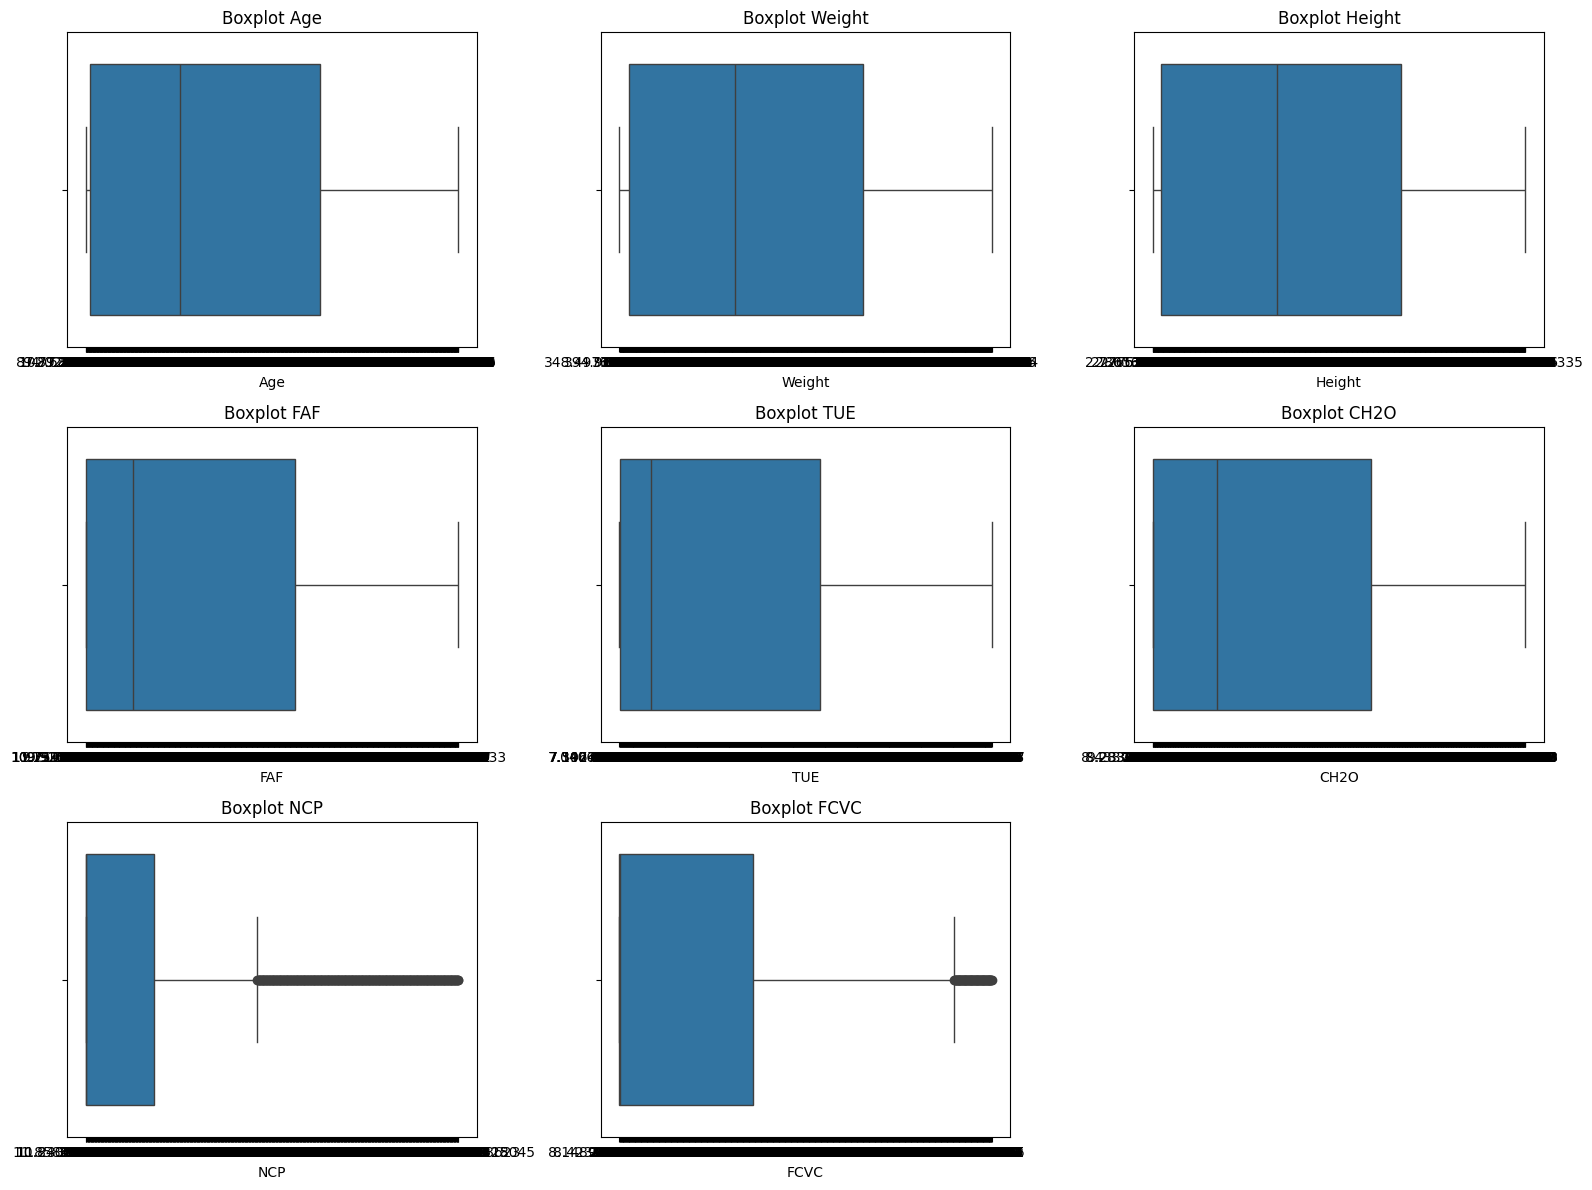

In [ ]:
#deteksi outlier dengan boxplot
numeric_cols = ['Age', 'Weight', 'Height', 'FAF', 'TUE', 'CH2O', 'NCP', 'FCVC']

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot {col}")
    plt.tight_layout()

plt.show()


In [ ]:
#memisahkan kolom kategori dan numerik
df_numeric = df.select_dtypes(include=[np.number])
df_categorical = df.select_dtypes(exclude=[np.number])

In [ ]:
#menampilkan kolom numerik
df_numeric.head()

""
0
1
2
3
4


In [ ]:
#menangani outliers dengan
for col in numeric_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
  df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

TypeError: unsupported operand type(s) for -: 'str' and 'str'